**Importing pandas to read a dataset, matplotlib,seaborn import for plotting and libraries**

In [ ]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**To Read Seed-Dataset**

In [ ]:
data=pd.read_csv('https://query.data.world/s/uouysa55slsp4etdkc3ova7hww6xue')
print(data)

      ID   area  ...  lengthOfKernelGroove  seedType
0      1  15.26  ...                 5.220         1
1      2  14.88  ...                 4.956         1
2      3  14.29  ...                 4.825         1
3      4  13.84  ...                 4.805         1
4      5  16.14  ...                 5.175         1
..   ...    ...  ...                   ...       ...
205  206  12.19  ...                 4.870         3
206  207  11.23  ...                 5.003         3
207  208  13.20  ...                 5.056         3
208  209  11.84  ...                 5.044         3
209  210  12.30  ...                 5.063         3

[210 rows x 9 columns]


**To Generate descriptive Statistics Information through describe() method**

In [ ]:
data.describe()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,105.500000,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,60.765944,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,1.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,53.250000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,105.500000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,157.750000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,210.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


**To Findout the top-rows of data of Seed-Dataset**

In [ ]:
data.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


**To find any null values in the data**

In [ ]:
data.isnull().sum()

ID                      0
area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

**Taking lengthOfKernel and widthOfKernel in X to make clusters:**

In [ ]:
x=data.iloc[:,[4,5]]

**To dispaly the first 3 rows of X:**

In [ ]:
x.head(3)

,lengthOfKernel,widthOfKernel
0,5.763,3.312
1,5.554,3.333
2,5.291,3.337


**Splitting the dataset into 70:30**

In [ ]:
X = data.drop('seedType', axis=1)
Y= data['seedType']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=10)
y_test.value_counts()

3    21
2    21
1    21
Name: seedType, dtype: int64

**Decision-Tree Algorithm:**
It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

**To Train Decision-Tree Model**

In [ ]:
tree = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=5,max_depth=None,random_state=10)
clf=tree.fit(X_train, y_train)
pred = clf.predict(X_test)

 **To see the accuracy and classification-report of the DT model through Classification-Performance Metrics.**

In [ ]:
accuracy = accuracy_score(y_test, pred)
print(classification_report(y_test,pred))
print('DecisionTreeClassifier Accuracy Score: ',accuracy)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        21

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

DecisionTreeClassifier Accuracy Score:  1.0


**To display the confusion-matrix of the model through ConfusionMatrixDisplay.**

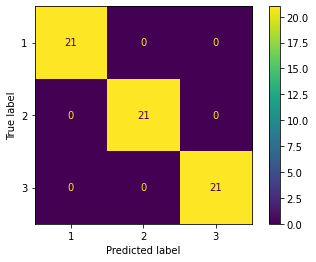

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cls_mat=confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(cls_mat,display_labels=clf.classes_)
disp.plot()

**SVM Algorithm:**
SVM algorithm picks the one that has the maximum distance from the closest data points. Kernel SVM contains a non-linear transformation function to convert the complicated non-linearly separable data into linearly separable data.It performs the same in such a way that datasets belonging to different classes are allocated to different dimensions. 

**To Train Support Vector Machine Tree Model**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(gamma='auto')
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 **To predict the Support Vector Machine model**

In [ ]:
predictions = svm_model.predict(X_test)

 **To see the accuracy and classification-report of the SVM model through Classification-Performance Metrics.**

In [ ]:
from sklearn import metrics
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('SVMClassifier Accuracy-Score: ',metrics.accuracy_score(y_test,predictions))

[[21  0  0]
 [ 0 21  0]
 [ 0  0 21]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        21

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

SVMClassifier Accuracy-Score:  1.0


**To display the confusion-matrix of the Support Vector Machine model through ConfusionMatrixDisplay.**

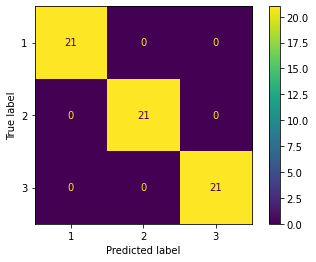

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cls_mat=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cls_mat,display_labels=clf.classes_)
disp.plot()

**KNN Algorithm:**
It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance.

**To Train K-Nearest Neighbors  Tree Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

 **To predict the K-Nearest Neighbors model**

In [ ]:
pre = knn_model.predict(X_test)

**To see the accuracy and classification-report of the K-Nearest Neighbors model through Classification-Performance Metrics.**

In [ ]:
from sklearn import metrics
print(confusion_matrix(y_test,pre))
print(classification_report(y_test,pre))
print('KNNClassifier Accuracy-Score: ',metrics.accuracy_score(y_test,pre))

[[21  0  0]
 [ 0 20  1]
 [ 0  0 21]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.98        21
           3       0.95      1.00      0.98        21

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63

KNNClassifier Accuracy-Score:  0.9841269841269841


**To display the confusion-matrix of the K-Nearest Neighbors model through ConfusionMatrixDisplay.**

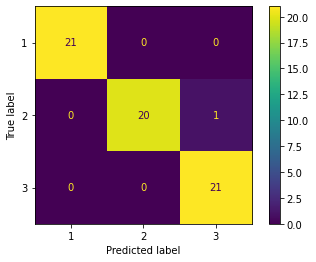

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cls_mat=confusion_matrix(y_test,pre)
disp = ConfusionMatrixDisplay(cls_mat,display_labels=clf.classes_)
disp.plot()